<a href="https://colab.research.google.com/github/ayshahussen/DS3001_project_chd/blob/main/Project_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Coronary Heart Disease

**Group 2: Randa Ampah, Neha Channamraju, Rebekah Weaver, Faith Koobial, Gian Baez, Aysha Hussen**

In [3]:
## importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

### Cleaning data

In [4]:
# Loading training data
#! git clone https://github.com/Nehach73/DS3001_project_chd.git
chd = pd.read_csv('fhs_train.csv')
chd = chd.dropna()
chd.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,1054,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [5]:
chd = chd.rename(columns={'Unnamed: 0':'patientID'})
chd.describe()

,patientID,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2744.000000,2744.000000,2744.000000,2744.00000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000,2744.000000
mean,2131.452259,0.451531,49.587464,1.95481,0.488338,9.072522,0.030248,0.006195,0.322522,0.027697,236.606414,132.803754,83.175109,25.881440,75.786443,81.692055,0.154519
std,1238.093223,0.497736,8.527005,1.01149,0.499955,12.059226,0.171300,0.078481,0.467527,0.164133,44.055010,22.414487,12.015964,4.144616,12.007697,23.439117,0.361511
min,1.000000,0.000000,32.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,51.000000,15.540000,44.000000,40.000000,0.000000
25%,1053.750000,0.000000,42.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2146.500000,0.000000,49.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3230.250000,1.000000,56.000000,3.00000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.250000,144.000000,90.000000,28.130000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.00000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [6]:
# Looking for the most explanatory variables
chd.corr()['TenYearCHD']

patientID         -0.012562
sex                0.100394
age                0.233327
education         -0.058663
currentSmoker      0.007957
cigsPerDay         0.050614
BPMeds             0.095222
prevalentStroke    0.043344
prevalentHyp       0.168785
diabetes           0.099882
totChol            0.113374
sysBP              0.213761
diaBP              0.140177
BMI                0.074476
heartRate          0.022805
glucose            0.119846
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

### LINEAR REG

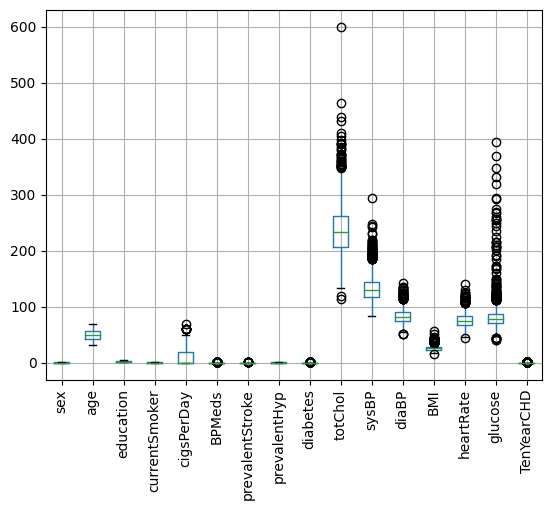

In [8]:
chd_bp = chd.drop(columns=['patientID']) #skewed everything else
chd_bp.boxplot(rot=90)
plt.show()

In [10]:
chd_test = chd.dropna()

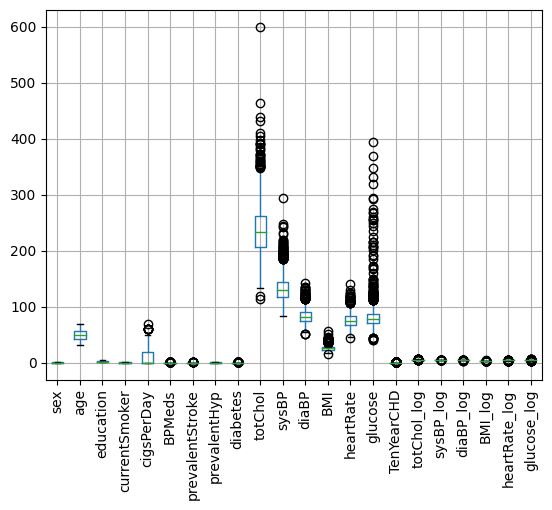

In [13]:
# log vairables w outliers
chd_bp['totChol_log'] = np.log(chd['totChol'])
chd_bp['sysBP_log'] = np.log(chd['sysBP'])
chd_bp['diaBP_log'] = np.log(chd['diaBP'])
chd_bp['BMI_log'] = np.log(chd['BMI'])
chd_bp['heartRate_log'] = np.log(chd['heartRate'])
chd_bp['glucose_log'] = np.log(chd['glucose'])

chd_test['totChol_log'] = np.log(chd['totChol'])
chd_test['sysBP_log'] = np.log(chd['sysBP'])
chd_test['diaBP_log'] = np.log(chd['diaBP'])
chd_test['BMI_log'] = np.log(chd['BMI'])
chd_test['heartRate_log'] = np.log(chd['heartRate'])
chd_test['glucose_log'] = np.log(chd['glucose'])

chd_bp.boxplot(rot=90)
plt.show()

In [17]:
chd_test = chd.drop(columns=['patientID'])

In [19]:
from sklearn.linear_model import LinearRegression #teacher's example from recent email

X = chd_bp.drop('TenYearCHD',axis=1)
y = chd_bp['TenYearCHD']
X_test = chd_test.drop('TenYearCHD',axis=1)
y_test = chd_test['TenYearCHD']

model = LinearRegression()
lm = model.fit(X,y)
y_hat = lm.predict(X_test)

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.10873266037841411


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Feature selection
features = ['age','sysBP', 'currentSmoker', 'glucose']

# Split data into features and target variable
chd2=chd.copy()
chd2.drop(columns=['patientID'], inplace=True)

X = chd2[features]
y = chd2['TenYearCHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model build, fit, predict
model = LinearRegression()
lm = model.fit(X,y)
y_hat = lm.predict(X_test)

# R^2

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.07679231091353622


In [21]:
print(chd_bp.columns)
print(chd_test.columns)

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'totChol_log',
       'sysBP_log', 'diaBP_log', 'BMI_log', 'heartRate_log', 'glucose_log'],
      dtype='object')
Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'totChol_log',
       'sysBP_log', 'diaBP_log', 'BMI_log', 'heartRate_log', 'glucose_log'],
      dtype='object')


In [26]:
# Check unique values of the "currentSmoker" feature
unique_values = chd2['currentSmoker'].unique()

# Check data type of the "currentSmoker" feature
data_type = chd2['currentSmoker'].dtype

print("Unique Values:", unique_values)
print("Data Type:", data_type)


Unique Values: [0 1]
Data Type: int64



# KNN model